# Monthly Total Precipitation Climatology (1979-2022) Using ERA5 Reanalysis Data
## Tehreem Qureshi, CLIM680
### See below for a multi-panel plot of 12 month climatologies (1979-2022) of total precipitation in meters. My dataset is from ERA5 Reanalysis, and I download and concatenate yearly daily sum files (which is the resolution I use for my research), resample into monthly resolution sums, and use grouby and means to obtain and plot climatologies. Note that I have commented out the code I used for preprocessing monthly data but included it to show progress.  

In [31]:
import xarray as xr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from matplotlib.colors import LogNorm

In [32]:
# files = ('precip_daily_sum*.nc') # daily era5 precip values from 1979-2022
# precip_ds_daily = xr.open_mfdataset(files, combine="by_coords", engine="netcdf4",  decode_times=True)
# precip_ds_daily # combine into one big netcdf file from 1970-2022 daily precip sums
# resample into monthly values using built in resample method -> output monthly sums of precip
# precip_ds_monthly = precip_ds_daily.tp.resample(valid_time='1MS').sum()
# precip_ds_monthly
# precip_ds_monthly.to_netcdf('monthly_precip_sum.nc') # output into .nc file to be in current directory

In [33]:
filename = '/home/tquresh/clim680/monthly_precip_sum.nc' # monthly values of total precipitation (m) from 1979-2022
monthly_precip19792022 = xr.open_dataset(filename)
monthly_precip19792022 # open.nc file to ensure it works

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 528, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2022-12-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 2GB ...

In [34]:
monthlyprecip_clim = monthly_precip19792022.groupby('valid_time.month').mean() # groupby month and take mean along time dimension, equating to monthly 1979-2022 climatology
monthlyprecip_clim = monthlyprecip_clim.assign_coords(
    month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']) # use assign coords instead of renaming so string disappears and names are in month
monthlyprecip_clim['tp'] = monthlyprecip_clim['tp'] * 1000 # change units from m to mm 
monthlyprecip_clim['tp'].attrs['units'] = 'mm'
monthlyprecip_clim

<xarray.Dataset> Size: 50MB
Dimensions:    (month: 12, latitude: 721, longitude: 1440)
Coordinates:
  * month      (month) <U9 432B 'January' 'February' ... 'November' 'December'
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number     int64 8B 0
Data variables:
    tp         (month, latitude, longitude) float32 50MB 14.04 14.04 ... 3.33

/home/tquresh/miniforge/envs/clim680/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/tquresh/miniforge/envs/clim680/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/tquresh/miniforge/envs/clim680/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/tquresh/miniforge/envs/clim680/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/tquresh/miniforge/envs/clim680/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/tqur

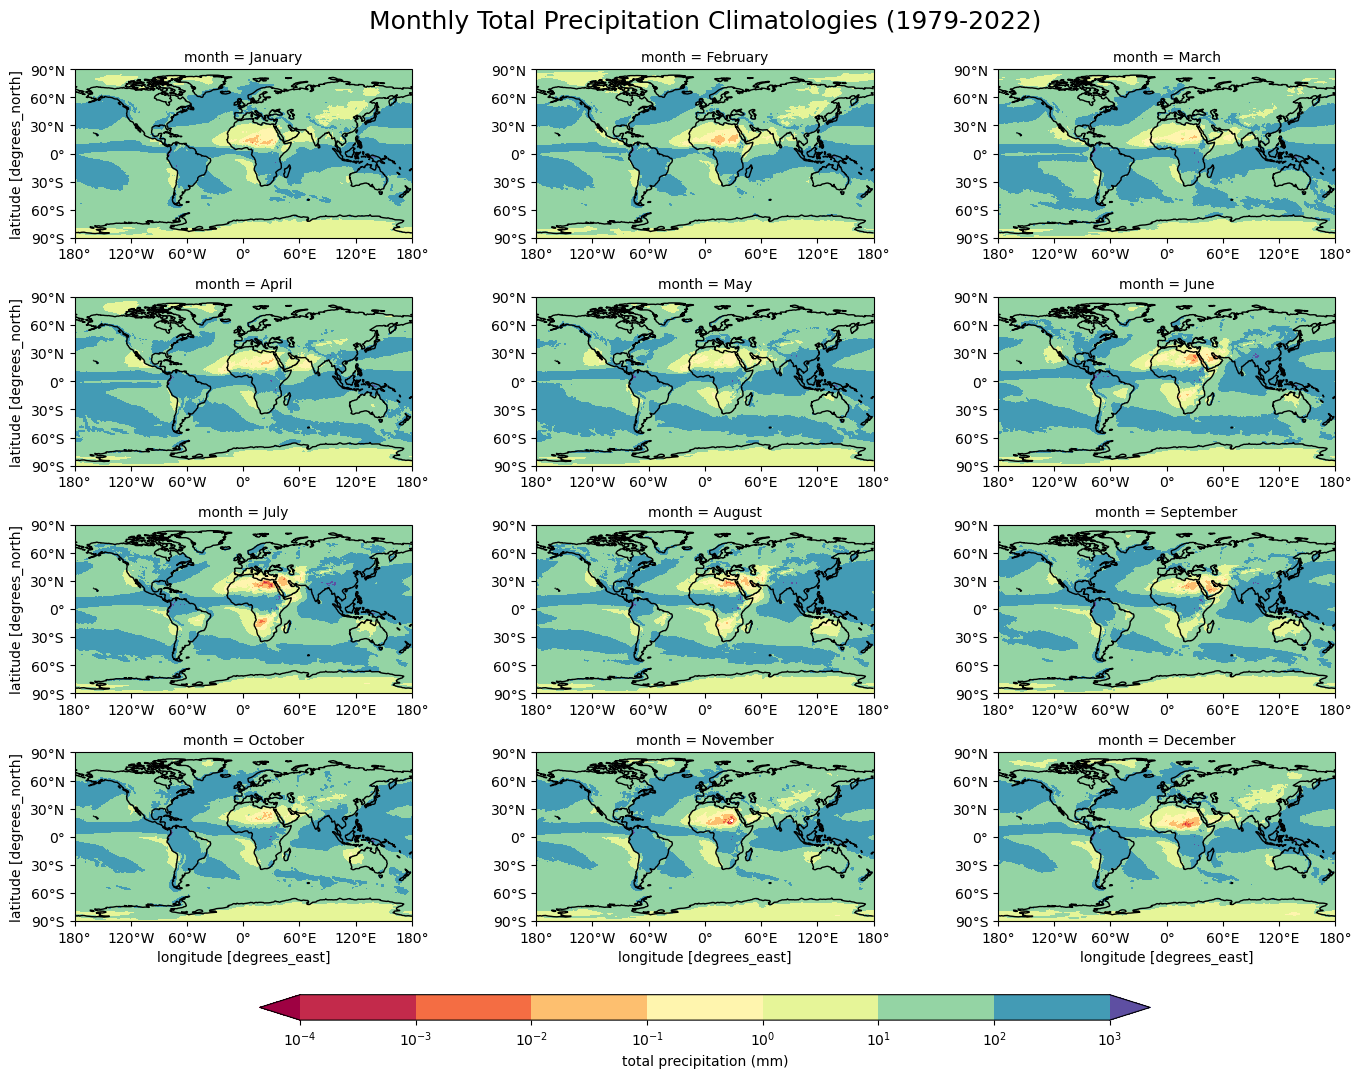

In [39]:
# below plots monthly climatologies using faceting example from class
fg = monthlyprecip_clim['tp'].plot.contourf(
    row='month', # each subplot represents a month
    col_wrap=3, # use three columns to space out evenly 
    robust=True,
    extend = 'both',
    norm=LogNorm(vmin=1e-4, vmax=monthlyprecip_clim['tp'].values.max()), # note that lognorm is likely a good visualization given that both of us agreed the linear scale might not be the best way to represent these values.
    # i changed the vmin to something very small as it seems to be the popular way xarray users go around the issue of having 0 values since 0 values will throw an error as log 0 is undefined - should not affect visualization of data too much
    cmap='Spectral', # viridis and my prev yellow/green/blues were not as clear in new lognorm - this seems to be common in exampels and visualizes large, logarthimic increases better since it is discrete 
    subplot_kws={"projection": ccrs.PlateCarree()}, # projection  
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.65, # make colorbar slightly smaller
        "aspect": 35,
        "pad": .05,
        "label": "total precipitation (mm)",
    },
    figsize=(14, 12) # larger plots 
)

for ax in fg.axes.flat:
    ax.coastlines()
    
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

plt.subplots_adjust( # figures overlapping quite a bit in the original so adjust spacing
    top=0.93,   
    bottom=0.22,
    hspace=0.35,   
)
plt.suptitle("Monthly Total Precipitation Climatologies (1979-2022)", fontsize=18)
plt.show()